# Linear Regression 

In [1]:
import numpy as np
from numpy.linalg import inv
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt
import seaborn as sns

from tqdm import tqdm
import os

np.random.seed(42)

## Linear Regression with One Variable

### Loading Dataset

In [22]:
df = pd.read_csv(r'./HW2_Dataset/dataset1.csv')

In [23]:
df.head()

,x,y
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [24]:
df.shape

(97, 2)

In [25]:
X = df['x'].to_numpy().reshape(-1, 1)
y = df['y'].to_numpy().reshape(-1, 1)
X_with_bias = np.hstack([np.ones((X.shape[0], 1)), X])

In [26]:
X_with_bias.shape

(97, 2)

Loss history dict for latter recording of loss

In [48]:
loss_history = {'SGD':[], 'GD':[], 'Ground Truth Loss':[]}

### 1. Cost Function

$$MSE = \frac{1}{n}\sum_{i = 1}^n (y^i - \hat{y}^i)^2$$

In [ ]:
def MSE(y, y_hat):
    
    return np.mean(np.square(y - y_hat))

### a. Closed Form Solution
$$\theta = (X^TX)^{-1}X^T\vec{y}$$

In [50]:
inv_XTX = inv(np.matmul(X_with_bias.T,X_with_bias))
W_c = inv_XTX @ X_with_bias.T @ y

print("W Closed Form is : ", W_c)
print("Shape of W : ", W_c.shape)

W Closed Form is :  [[-3.89578088]
 [ 1.19303364]]
Shape of W :  (2, 1)


**Closed Form Solution**
$$
y = \theta_0 + \theta_1x
$$
where:
$$
\theta_0 = -3.8957\\
\theta_1 = 1.1930
$$

### b. Stochastic Gradient Descent

In [51]:
lr: float = 1e-2
iters: int = 1500
W_sgd = np.random.rand(X_with_bias.shape[1], 1)


for iter in tqdm(range(iters)):
    for sample_idx in range(X_with_bias.shape[0]):
        x_sgd = X_with_bias[sample_idx] # a vector (1, 2)
        y_sgd = y[sample_idx] # a scalar 
        y_pred_sgd = x_sgd @ W_sgd # y hat
        
        dJ_dW = (y_sgd - y_pred_sgd) * x_sgd # Computing dJ/dw
        dJ_dW = dJ_dW.reshape(-1, 1) # reshape to be (2, 1) instead of (2, )
        W_sgd = W_sgd + lr * dJ_dW # Updating Parameters

    # Recording loss at each iteration
    y_pred = X_with_bias @ W_sgd
    loss_history['SGD'].append(MSE(y, y_pred))

100%|██████████| 1500/1500 [00:01<00:00, 839.63it/s]


In [52]:
W_sgd

array([[-3.84815292],
       [ 1.05705257]])

**Stochastic Gradient Descent Solution**
$$
y = \theta_0 + \theta_1x
$$
where:
$$
\theta_0 = -3.8481\\
\theta_1 = 1.0570
$$

### c. Batch Gradient Descent

In [53]:
lr: float = 1e-2
epochs: int = 1500
W_gd = np.random.rand(X_with_bias.shape[1], 1)


for iter in tqdm(range(epochs)):
    y_pred_gd = X_with_bias @ W_gd 
        
    dJ_dW = (X_with_bias.T @ (y - y_pred_gd)) / len(y) # Calculating gradient in a vectorized way
        
    W_gd = W_gd + lr * dJ_dW # Updating Parameters
    
    
    # Recording loss at each epoch
    y_pred = X_with_bias @ W_gd
    loss_history['GD'].append(MSE(y, y_pred))

100%|██████████| 1500/1500 [00:00<00:00, 42211.22it/s]


In [54]:
W_gd

array([[-3.61948842],
       [ 1.16527707]])

**Batch Gradient Descent Solution**
$$
y = \theta_0 + \theta_1x
$$
where:
$$
\theta_0 = -3.6353\\
\theta_1 = 1.1668
$$

### 3. Plot Dataset and Fitted Lines

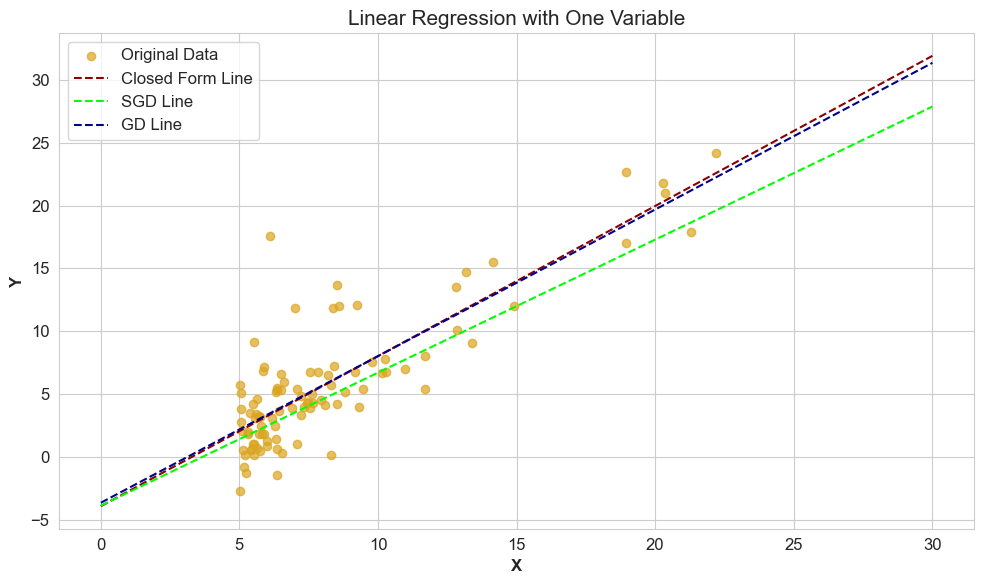

In [55]:
# Plot configuration
plt.figure(figsize=(10, 6), dpi=100)
sns.set_style("whitegrid")
plt.rcParams['font.size'] = 12
plt.rcParams['axes.labelweight'] = 'bold'


# Plotting data
plt.scatter(X, y, color='goldenrod', alpha=0.7, label='Original Data')

# Plotting lines
lines = {'Closed Form': W_c.flatten(),'SGD': W_sgd.flatten(), 'GD': W_gd.flatten() }

colors = ['darkred', 'lime', 'darkblue']
for idx, (name, (w1, w2)) in enumerate(lines.items()):
    y_line = w1 + w2 * np.array([0, 30])
    
    plt.plot(np.array([0, 30]), y_line, 
             color=colors[idx], 
             linestyle='--', 
             linewidth=1.5, 
             label=f'{name} Line')

plt.title('Linear Regression with One Variable', fontsize=15)
plt.xlabel('X', fontsize=12)
plt.ylabel('Y', fontsize=12)
plt.legend()
plt.tight_layout()
plt.show()

### 4. Prediction

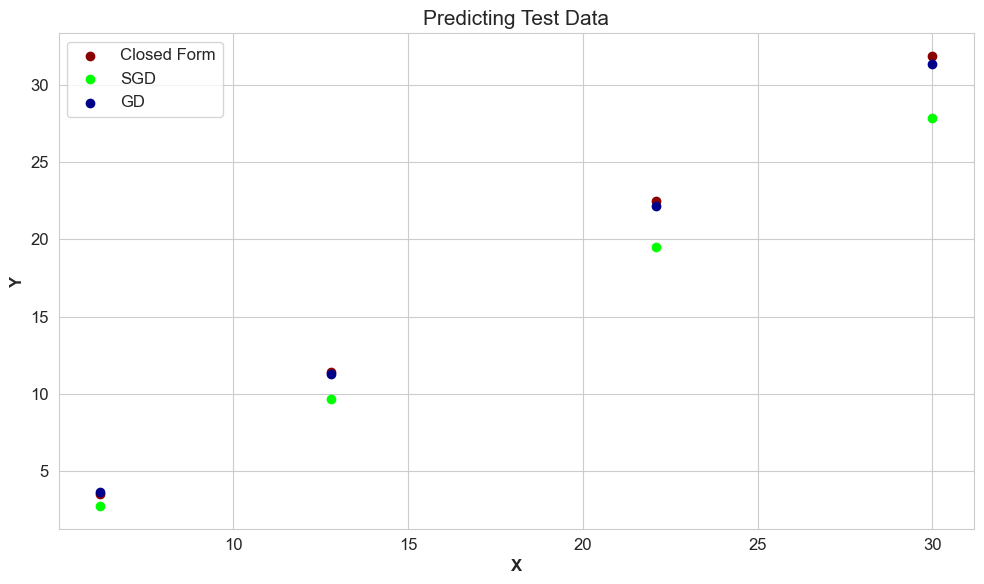

In [56]:
# Plot configuration
plt.figure(figsize=(10, 6), dpi=100)
sns.set_style("whitegrid")
plt.rcParams['font.size'] = 12
plt.rcParams['axes.labelweight'] = 'bold'


colors = ['darkred', 'lime', 'darkblue']

X_test = np.array([6.2, 12.8, 22.1, 30])

for idx, (name, (w1, w2)) in enumerate(lines.items()):
    y_pred = w1 + w2 * X_test
    
    plt.scatter(X_test, y_pred, color=colors[idx], label=f'{name}')
    
    
    
plt.title('Predicting Test Data', fontsize=15)
plt.xlabel('X', fontsize=12)
plt.ylabel('Y', fontsize=12)
plt.legend()
plt.tight_layout()
plt.show()

### 5. Comparing Parameter $\theta$ of Lines

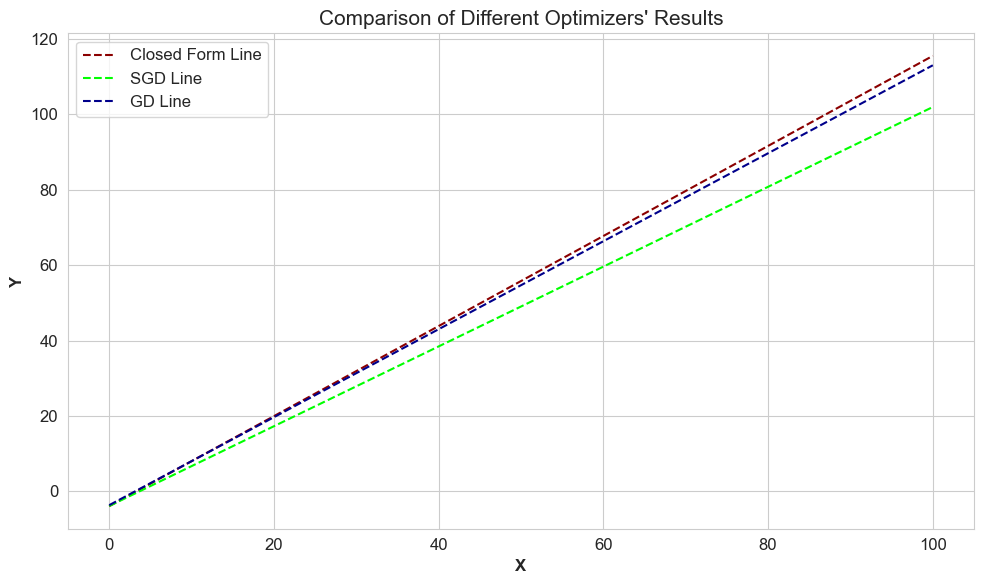

In [57]:
# Plot configuration
plt.figure(figsize=(10, 6), dpi=100)
sns.set_style("whitegrid")
plt.rcParams['font.size'] = 12
plt.rcParams['axes.labelweight'] = 'bold'

# Plotting lines
lines = {'Closed Form': W_c.flatten(),'SGD': W_sgd.flatten(), 'GD': W_gd.flatten() }

colors = ['darkred', 'lime', 'darkblue']
for idx, (name, (w1, w2)) in enumerate(lines.items()):
    y_line = w1 + w2 * np.array([0, 100])
    
    plt.plot(np.array([0, 100]), y_line, 
             color=colors[idx], 
             linestyle='--', 
             linewidth=1.5, 
             label=f'{name} Line')

plt.title('Comparison of Different Optimizers\' Results', fontsize=15)
plt.xlabel('X', fontsize=12)
plt.ylabel('Y', fontsize=12)
plt.legend()
plt.tight_layout()
plt.show()

### 6. Plotting Cost Function

In [58]:
# Prepare and adding ground truth loss to the loss_history

y_pred_closed_form = X_with_bias @ W_c
gnd_loss = MSE(y, y_pred_closed_form)
loss_history['Ground Truth Loss'] = [gnd_loss for i in range(len(loss_history['SGD']))]

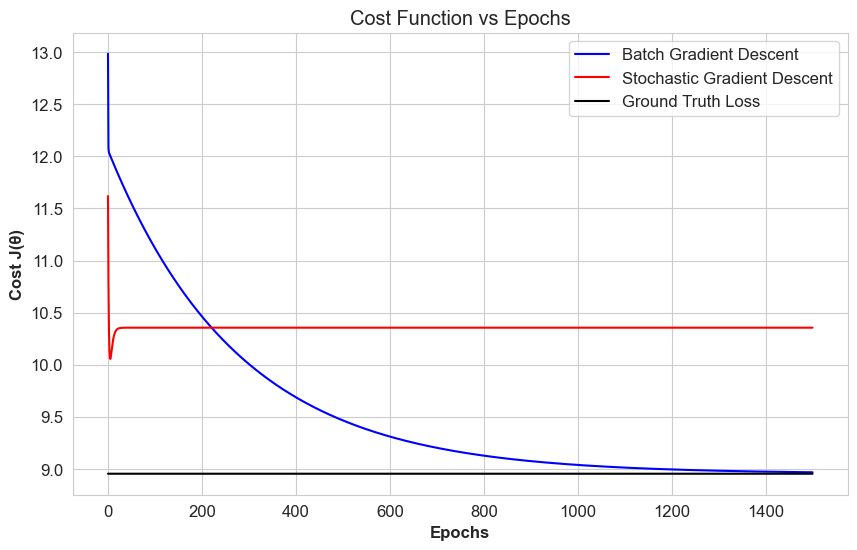

In [59]:
# Plot configuration
plt.figure(figsize=(10, 6), dpi=100)
sns.set_style("whitegrid")
plt.rcParams['font.size'] = 12
plt.rcParams['axes.labelweight'] = 'bold'

# Plotting
plt.plot(range(len(loss_history['GD'])), loss_history['GD'], label='Batch Gradient Descent', color='blue')
plt.plot(range(len(loss_history['SGD'])), loss_history['SGD'], label='Stochastic Gradient Descent', color='red')
plt.plot(range(len(loss_history['Ground Truth Loss'])), loss_history['Ground Truth Loss'], label='Ground Truth Loss', color='Black')

plt.xlabel('Epochs')
plt.ylabel('Cost J(θ)')
plt.title('Cost Function vs Epochs')
plt.legend()
plt.show()

## Multiple Variable Regression

### Loading Dataset

In [250]:
df_train = pd.read_csv(r'./HW2_Dataset/train.csv')
df_test = pd.read_csv(r'./HW2_Dataset/test.csv')

In [251]:
df_train.head()

,age,gender,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [252]:
df_test.head()

,age,gender,bmi,children,smoker,region,charges
0,30,male,22.99,2,yes,northwest,17361.76610
1,24,male,32.70,0,yes,southwest,34472.84100
2,24,male,25.80,0,no,southwest,1972.95000
3,48,male,29.60,0,no,southwest,21232.18226
4,47,male,19.19,1,no,northeast,8627.54110


In [253]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1000 non-null   int64  
 1   gender    1000 non-null   object 
 2   bmi       1000 non-null   float64
 3   children  1000 non-null   int64  
 4   smoker    1000 non-null   object 
 5   region    1000 non-null   object 
 6   charges   1000 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 54.8+ KB


In [254]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       150 non-null    int64  
 1   gender    150 non-null    object 
 2   bmi       150 non-null    float64
 3   children  150 non-null    int64  
 4   smoker    150 non-null    object 
 5   region    150 non-null    object 
 6   charges   150 non-null    float64
dtypes: float64(2), int64(2), object(3)
memory usage: 8.3+ KB


### Data Preprocessing

#### Encoding Categorical Features

In [255]:
# Integer Encoding
df_train['gender'] = df_train['gender'].astype('category').cat.codes
df_train['smoker'] = df_train['smoker'].astype('category').cat.codes

df_test['gender'] = df_test['gender'].astype('category').cat.codes
df_test['smoker'] = df_test['smoker'].astype('category').cat.codes

In [256]:
# OHE Encoding
df_train = pd.get_dummies(df_train, columns=['region'])
df_test = pd.get_dummies(df_test, columns=['region'])

In [257]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               1000 non-null   int64  
 1   gender            1000 non-null   int8   
 2   bmi               1000 non-null   float64
 3   children          1000 non-null   int64  
 4   smoker            1000 non-null   int8   
 5   charges           1000 non-null   float64
 6   region_northeast  1000 non-null   bool   
 7   region_northwest  1000 non-null   bool   
 8   region_southeast  1000 non-null   bool   
 9   region_southwest  1000 non-null   bool   
dtypes: bool(4), float64(2), int64(2), int8(2)
memory usage: 37.2 KB


In [258]:
# # Converting boolean columns to int
# bool_columns = df_train.select_dtypes(include=['bool']).columns

# for col in bool_columns:
#    df_train[col] = df_train[col].astype(int)
#    df_test[col] = df_test[col].astype(int)
   
# # Excluding charges from getting scaled
# scaled_columns = [col for col in df_train.columns if col != 'charges']  

# scaler = StandardScaler() # Scaler object


# df_train[scaled_columns] = scaler.fit_transform(df_train[scaled_columns])
# df_test[scaled_columns] = scaler.transform(df_test[scaled_columns])

#### $\log$ Scaling Target Column

In [259]:
df_train['charges'] = np.log(df_train['charges'])
df_test['charges'] = np.log(df_test['charges'])

In [260]:
df_train['charges'].head()

0    9.734176
1    7.453302
2    8.400538
3    9.998092
4    8.260197
Name: charges, dtype: float64

#### Squaring `bmi` Feature

In [261]:
df_train['bmi'] = df_train['bmi'] ** 2
df_test['bmi'] = df_test['bmi'] ** 2

#### Data Splitting

In [262]:
X_train = df_train.drop(columns=['charges']).to_numpy()
X_train = np.hstack([np.ones((X_train.shape[0], 1)), X_train])

X_test = df_test.drop(columns=['charges']).to_numpy()
X_test= np.hstack([np.ones((X_test.shape[0], 1)), X_test])


y_train = df_train['charges'].to_numpy().reshape(-1, 1)
y_test = df_test['charges'].to_numpy().reshape(-1, 1)

#### Standardize Dataset

In [263]:
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### Closed Form Solution

#### Preparing data

In [264]:
df_total = pd.concat([df_train, df_test], ignore_index=True)

In [265]:
df_total.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1150 entries, 0 to 1149
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               1150 non-null   int64  
 1   gender            1150 non-null   int8   
 2   bmi               1150 non-null   float64
 3   children          1150 non-null   int64  
 4   smoker            1150 non-null   int8   
 5   charges           1150 non-null   float64
 6   region_northeast  1150 non-null   bool   
 7   region_northwest  1150 non-null   bool   
 8   region_southeast  1150 non-null   bool   
 9   region_southwest  1150 non-null   bool   
dtypes: bool(4), float64(2), int64(2), int8(2)
memory usage: 42.8 KB


In [266]:
X_c = df_total.drop(columns=['charges']).to_numpy()
X_c = np.hstack([np.ones((X_c.shape[0], 1)), X_c])
X_c = X_c.astype(float)

y_c = df_total['charges'].to_numpy().reshape(-1, 1)
y_c = y_c.astype(float)

#### Calculation

In [267]:
inv_XTX = inv(X_c.T @ X_c)
W_c = inv_XTX @ X_c.T @ y_c

print("____W in Closed Form____\n", W_c)

print("Shape of W : ", W_c.shape)

____W in Closed Form____
 [[-1.87290021e+01]
 [-1.55668218e-01]
 [-2.50519597e+00]
 [-1.69633012e-03]
 [ 9.34462940e-02]
 [ 9.09712676e-01]
 [ 3.83348117e+01]
 [ 2.43548068e+01]
 [ 2.04010701e+01]
 [ 1.34860067e+01]]
Shape of W :  (10, 1)


### Recording Results

In [268]:
result_history = {'SGD':dict(), 'GD': dict(), 'Ground Truth': dict()}

### Stochastic Gradient Descent

In [269]:
lr: float = 1e-3
iters: int = 1500
W_sgd = np.zeros((X_train.shape[1], 1)) # params init random

for slice_idx in range(10, X_train.shape[0] + 1, 10):
    print(f'_______________Number of Data used is : {slice_idx}_______________')
    X_train_sliced = X_train[slice_idx - 10:slice_idx] # Slicing training set
    
    
    result_history['SGD'][slice_idx] = {'train_loss_history':np.zeros(iters), 'val_loss_history':np.zeros(iters)} # Preparation for Recording for the specific number of training samples
    
    for iter in tqdm(range(iters)):
        for sample_idx in range(X_train_sliced.shape[0]):
            x_sgd = X_train_sliced[sample_idx] # a vector (1, 10)
            y_sgd = y_train[sample_idx] # a scalar 
            y_pred_sgd = x_sgd @ W_sgd # y hat, scalar
            
            dJ_dW = (y_sgd - y_pred_sgd) * x_sgd # Computing dJ/dw
            dJ_dW = dJ_dW.reshape(-1, 1)
            W_sgd = W_sgd + lr * dJ_dW # Updating Parameters
        
        # print(W_sgd)
        # print('..................')
            
        

        
            
        # Recording train loss at each iteration
        y_pred = X_train[:slice_idx] @ W_sgd
        result_history['SGD'][slice_idx]['train_loss_history'][iter] = MSE(y_train[:slice_idx], y_pred)

        # Recording test loss at each iteration
        y_pred_test = X_test @ W_sgd
        result_history['SGD'][slice_idx]['val_loss_history'][iter] = MSE(y_test, y_pred_test)
        
result_history['SGD']['last_param'] = np.copy(W_sgd)


_______________Number of Data used is : 10_______________


100%|██████████| 1500/1500 [00:00<00:00, 7596.01it/s]


_______________Number of Data used is : 20_______________


100%|██████████| 1500/1500 [00:00<00:00, 10108.79it/s]


_______________Number of Data used is : 30_______________


100%|██████████| 1500/1500 [00:00<00:00, 11119.79it/s]


_______________Number of Data used is : 40_______________


100%|██████████| 1500/1500 [00:00<00:00, 11407.17it/s]


_______________Number of Data used is : 50_______________


100%|██████████| 1500/1500 [00:00<00:00, 11192.63it/s]


_______________Number of Data used is : 60_______________


100%|██████████| 1500/1500 [00:00<00:00, 10111.99it/s]


_______________Number of Data used is : 70_______________


100%|██████████| 1500/1500 [00:00<00:00, 7355.28it/s]


_______________Number of Data used is : 80_______________


100%|██████████| 1500/1500 [00:00<00:00, 10023.32it/s]


_______________Number of Data used is : 90_______________


100%|██████████| 1500/1500 [00:00<00:00, 9908.09it/s]


_______________Number of Data used is : 100_______________


100%|██████████| 1500/1500 [00:00<00:00, 10071.52it/s]


_______________Number of Data used is : 110_______________


100%|██████████| 1500/1500 [00:00<00:00, 10906.21it/s]


_______________Number of Data used is : 120_______________


100%|██████████| 1500/1500 [00:00<00:00, 9583.11it/s]


_______________Number of Data used is : 130_______________


100%|██████████| 1500/1500 [00:00<00:00, 9938.86it/s]


_______________Number of Data used is : 140_______________


100%|██████████| 1500/1500 [00:00<00:00, 9121.42it/s]


_______________Number of Data used is : 150_______________


100%|██████████| 1500/1500 [00:00<00:00, 10103.66it/s]


_______________Number of Data used is : 160_______________


100%|██████████| 1500/1500 [00:00<00:00, 11717.18it/s]


_______________Number of Data used is : 170_______________


100%|██████████| 1500/1500 [00:00<00:00, 8081.05it/s]


_______________Number of Data used is : 180_______________


100%|██████████| 1500/1500 [00:00<00:00, 11095.42it/s]


_______________Number of Data used is : 190_______________


100%|██████████| 1500/1500 [00:00<00:00, 7935.47it/s]


_______________Number of Data used is : 200_______________


100%|██████████| 1500/1500 [00:00<00:00, 9402.58it/s]


_______________Number of Data used is : 210_______________


100%|██████████| 1500/1500 [00:00<00:00, 10670.32it/s]


_______________Number of Data used is : 220_______________


100%|██████████| 1500/1500 [00:00<00:00, 7416.03it/s]


_______________Number of Data used is : 230_______________


100%|██████████| 1500/1500 [00:00<00:00, 8526.81it/s]


_______________Number of Data used is : 240_______________


100%|██████████| 1500/1500 [00:00<00:00, 9321.64it/s]


_______________Number of Data used is : 250_______________


100%|██████████| 1500/1500 [00:00<00:00, 10789.41it/s]


_______________Number of Data used is : 260_______________


100%|██████████| 1500/1500 [00:00<00:00, 10164.28it/s]


_______________Number of Data used is : 270_______________


100%|██████████| 1500/1500 [00:00<00:00, 7152.32it/s]


_______________Number of Data used is : 280_______________


100%|██████████| 1500/1500 [00:00<00:00, 9390.18it/s]


_______________Number of Data used is : 290_______________


100%|██████████| 1500/1500 [00:00<00:00, 8227.53it/s]


_______________Number of Data used is : 300_______________


100%|██████████| 1500/1500 [00:00<00:00, 8491.97it/s]


_______________Number of Data used is : 310_______________


100%|██████████| 1500/1500 [00:00<00:00, 8022.00it/s]


_______________Number of Data used is : 320_______________


100%|██████████| 1500/1500 [00:00<00:00, 8260.79it/s]


_______________Number of Data used is : 330_______________


100%|██████████| 1500/1500 [00:00<00:00, 11894.53it/s]


_______________Number of Data used is : 340_______________


100%|██████████| 1500/1500 [00:00<00:00, 9781.74it/s]


_______________Number of Data used is : 350_______________


100%|██████████| 1500/1500 [00:00<00:00, 9955.24it/s]


_______________Number of Data used is : 360_______________


100%|██████████| 1500/1500 [00:00<00:00, 7141.48it/s]


_______________Number of Data used is : 370_______________


100%|██████████| 1500/1500 [00:00<00:00, 9682.34it/s]


_______________Number of Data used is : 380_______________


100%|██████████| 1500/1500 [00:00<00:00, 11309.59it/s]


_______________Number of Data used is : 390_______________


100%|██████████| 1500/1500 [00:00<00:00, 9343.31it/s]


_______________Number of Data used is : 400_______________


100%|██████████| 1500/1500 [00:00<00:00, 9289.08it/s]


_______________Number of Data used is : 410_______________


100%|██████████| 1500/1500 [00:00<00:00, 11229.09it/s]


_______________Number of Data used is : 420_______________


100%|██████████| 1500/1500 [00:00<00:00, 9772.41it/s]


_______________Number of Data used is : 430_______________


100%|██████████| 1500/1500 [00:00<00:00, 10039.58it/s]


_______________Number of Data used is : 440_______________


100%|██████████| 1500/1500 [00:00<00:00, 9973.03it/s]


_______________Number of Data used is : 450_______________


100%|██████████| 1500/1500 [00:00<00:00, 6628.50it/s]


_______________Number of Data used is : 460_______________


100%|██████████| 1500/1500 [00:00<00:00, 7239.74it/s]


_______________Number of Data used is : 470_______________


100%|██████████| 1500/1500 [00:00<00:00, 8730.99it/s]


_______________Number of Data used is : 480_______________


100%|██████████| 1500/1500 [00:00<00:00, 6879.10it/s]


_______________Number of Data used is : 490_______________


100%|██████████| 1500/1500 [00:00<00:00, 7303.86it/s]


_______________Number of Data used is : 500_______________


100%|██████████| 1500/1500 [00:00<00:00, 7703.71it/s]


_______________Number of Data used is : 510_______________


100%|██████████| 1500/1500 [00:00<00:00, 7063.65it/s]


_______________Number of Data used is : 520_______________


100%|██████████| 1500/1500 [00:00<00:00, 9228.20it/s]


_______________Number of Data used is : 530_______________


100%|██████████| 1500/1500 [00:00<00:00, 9296.35it/s]


_______________Number of Data used is : 540_______________


100%|██████████| 1500/1500 [00:00<00:00, 9489.99it/s]


_______________Number of Data used is : 550_______________


100%|██████████| 1500/1500 [00:00<00:00, 8168.43it/s]


_______________Number of Data used is : 560_______________


100%|██████████| 1500/1500 [00:00<00:00, 9479.22it/s]


_______________Number of Data used is : 570_______________


100%|██████████| 1500/1500 [00:00<00:00, 9074.30it/s]


_______________Number of Data used is : 580_______________


100%|██████████| 1500/1500 [00:00<00:00, 5430.65it/s]


_______________Number of Data used is : 590_______________


100%|██████████| 1500/1500 [00:00<00:00, 8775.44it/s]


_______________Number of Data used is : 600_______________


100%|██████████| 1500/1500 [00:00<00:00, 6875.68it/s]


_______________Number of Data used is : 610_______________


100%|██████████| 1500/1500 [00:00<00:00, 7405.92it/s]


_______________Number of Data used is : 620_______________


100%|██████████| 1500/1500 [00:00<00:00, 9954.77it/s]


_______________Number of Data used is : 630_______________


100%|██████████| 1500/1500 [00:00<00:00, 9007.49it/s]


_______________Number of Data used is : 640_______________


100%|██████████| 1500/1500 [00:00<00:00, 6981.22it/s]


_______________Number of Data used is : 650_______________


100%|██████████| 1500/1500 [00:00<00:00, 9740.86it/s]


_______________Number of Data used is : 660_______________


100%|██████████| 1500/1500 [00:00<00:00, 9856.60it/s]


_______________Number of Data used is : 670_______________


100%|██████████| 1500/1500 [00:00<00:00, 7922.37it/s]


_______________Number of Data used is : 680_______________


100%|██████████| 1500/1500 [00:00<00:00, 7058.78it/s]


_______________Number of Data used is : 690_______________


100%|██████████| 1500/1500 [00:00<00:00, 8572.40it/s]


_______________Number of Data used is : 700_______________


100%|██████████| 1500/1500 [00:00<00:00, 8859.37it/s]


_______________Number of Data used is : 710_______________


100%|██████████| 1500/1500 [00:00<00:00, 8073.41it/s]


_______________Number of Data used is : 720_______________


100%|██████████| 1500/1500 [00:00<00:00, 5322.10it/s]


_______________Number of Data used is : 730_______________


100%|██████████| 1500/1500 [00:00<00:00, 8212.57it/s]


_______________Number of Data used is : 740_______________


100%|██████████| 1500/1500 [00:00<00:00, 7280.40it/s]


_______________Number of Data used is : 750_______________


100%|██████████| 1500/1500 [00:00<00:00, 9170.51it/s]


_______________Number of Data used is : 760_______________


100%|██████████| 1500/1500 [00:00<00:00, 7887.44it/s]


_______________Number of Data used is : 770_______________


100%|██████████| 1500/1500 [00:00<00:00, 7110.52it/s]


_______________Number of Data used is : 780_______________


100%|██████████| 1500/1500 [00:00<00:00, 6301.81it/s]


_______________Number of Data used is : 790_______________


100%|██████████| 1500/1500 [00:00<00:00, 7622.97it/s]


_______________Number of Data used is : 800_______________


100%|██████████| 1500/1500 [00:00<00:00, 7221.13it/s]


_______________Number of Data used is : 810_______________


100%|██████████| 1500/1500 [00:00<00:00, 9030.72it/s]


_______________Number of Data used is : 820_______________


100%|██████████| 1500/1500 [00:00<00:00, 9010.02it/s]


_______________Number of Data used is : 830_______________


100%|██████████| 1500/1500 [00:00<00:00, 9005.07it/s]


_______________Number of Data used is : 840_______________


100%|██████████| 1500/1500 [00:00<00:00, 6143.24it/s]


_______________Number of Data used is : 850_______________


100%|██████████| 1500/1500 [00:00<00:00, 9798.91it/s]


_______________Number of Data used is : 860_______________


100%|██████████| 1500/1500 [00:00<00:00, 7850.55it/s]


_______________Number of Data used is : 870_______________


100%|██████████| 1500/1500 [00:00<00:00, 7832.33it/s]


_______________Number of Data used is : 880_______________


100%|██████████| 1500/1500 [00:00<00:00, 9083.18it/s]


_______________Number of Data used is : 890_______________


100%|██████████| 1500/1500 [00:00<00:00, 8220.46it/s]


_______________Number of Data used is : 900_______________


100%|██████████| 1500/1500 [00:00<00:00, 6354.08it/s]


_______________Number of Data used is : 910_______________


100%|██████████| 1500/1500 [00:00<00:00, 9318.62it/s]


_______________Number of Data used is : 920_______________


100%|██████████| 1500/1500 [00:00<00:00, 8147.57it/s]


_______________Number of Data used is : 930_______________


100%|██████████| 1500/1500 [00:00<00:00, 7514.49it/s]


_______________Number of Data used is : 940_______________


100%|██████████| 1500/1500 [00:00<00:00, 8296.89it/s]


_______________Number of Data used is : 950_______________


100%|██████████| 1500/1500 [00:00<00:00, 5896.80it/s]


_______________Number of Data used is : 960_______________


100%|██████████| 1500/1500 [00:00<00:00, 8136.45it/s]


_______________Number of Data used is : 970_______________


100%|██████████| 1500/1500 [00:00<00:00, 8342.69it/s]


_______________Number of Data used is : 980_______________


100%|██████████| 1500/1500 [00:00<00:00, 8831.39it/s]


_______________Number of Data used is : 990_______________


100%|██████████| 1500/1500 [00:00<00:00, 8364.64it/s]


_______________Number of Data used is : 1000_______________


100%|██████████| 1500/1500 [00:00<00:00, 6421.50it/s]


#### Plotting the Full Data Training

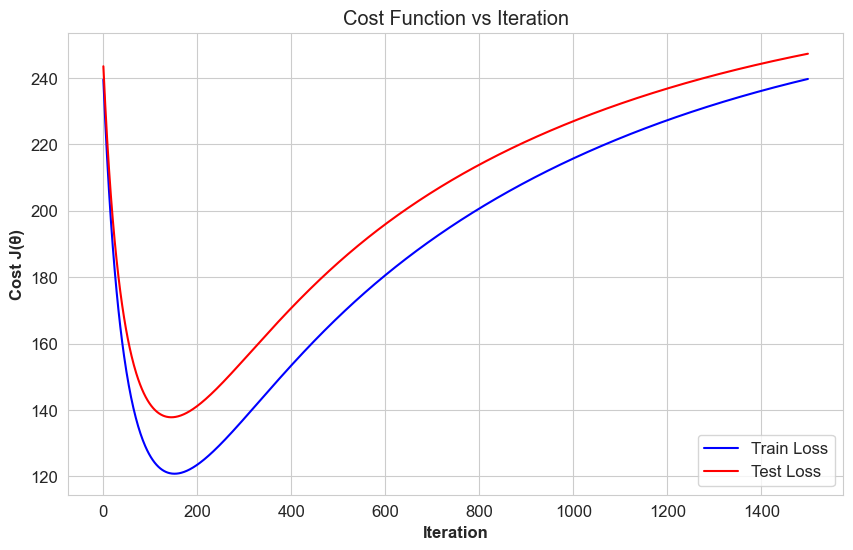

In [270]:
train_loss_history = result_history['SGD'][1000]['train_loss_history']
val_loss_history = result_history['SGD'][1000]['val_loss_history']
iters = np.arange(iters)


# Plot configuration
plt.figure(figsize=(10, 6), dpi=100)
sns.set_style("whitegrid")
plt.rcParams['font.size'] = 12
plt.rcParams['axes.labelweight'] = 'bold'

# Plotting
plt.plot(iters, train_loss_history, label='Train Loss', color='blue')
plt.plot(iters, val_loss_history, label='Test Loss', color='red')

plt.xlabel('Iteration')
plt.ylabel('Cost J(θ)')
plt.title('Cost Function vs Iteration')
plt.legend()
plt.show()

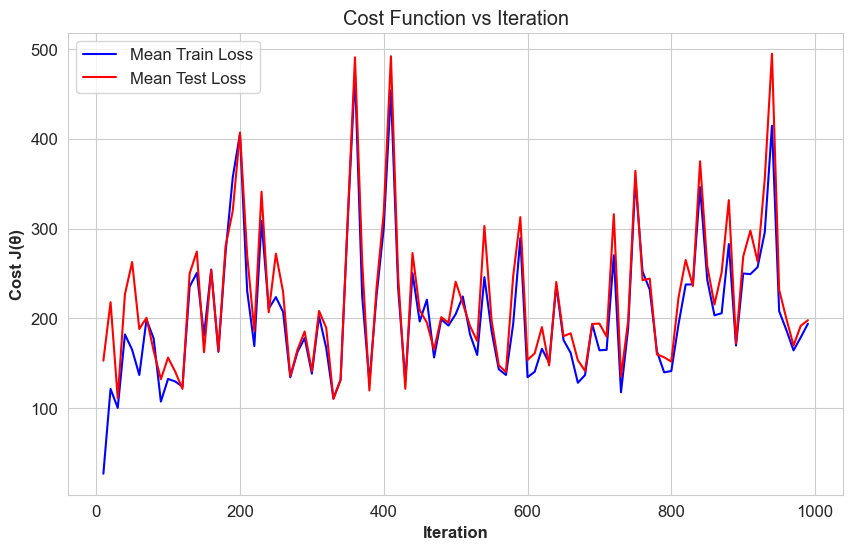

In [279]:
dataset_size = np.arange(10, X_train.shape[0], 10)

mean_train_loss = np.array([np.mean(result_history['SGD'][size]['train_loss_history']) for size in dataset_size])
mean_val_loss = np.array([np.mean(result_history['SGD'][size]['val_loss_history']) for size in dataset_size])


# Plot configuration
plt.figure(figsize=(10, 6), dpi=100)
sns.set_style("whitegrid")
plt.rcParams['font.size'] = 12
plt.rcParams['axes.labelweight'] = 'bold'

# Plotting
plt.plot(dataset_size, mean_train_loss, label='Mean Train Loss', color='blue')
plt.plot(dataset_size, mean_val_loss, label='Mean Test Loss', color='red')

plt.xlabel('Iteration')
plt.ylabel('Cost J(θ)')
plt.title('Cost Function vs Iteration')
plt.legend()
plt.show()

### Batch Gradient Descent

In [276]:
lr: float = 1e-3
epochs: int = 1500

W_gd = np.zeros((X_train.shape[1], 1)) # params init random

for slice_idx in range(10, X_train.shape[0] + 1, 10):
    print(f'_______________Number of Data used is : {slice_idx}_______________')
    
    X_train_sliced = X_train[slice_idx - 10:slice_idx] # Slicing training set
    y_sliced = y_train[slice_idx - 10:slice_idx]
    
    result_history['GD'][slice_idx] = {'train_loss_history':np.zeros(epochs), 'val_loss_history':np.zeros(epochs), 'params':None} # Preparation for Recording for the specific number of training samples

    for iter in tqdm(range(epochs)):
        y_pred_gd = X_train_sliced @ W_gd 
            
        dJ_dW = (X_train_sliced.T @ (y_sliced - y_pred_gd)) / len(y_sliced) # Calculating gradient in a vectorized way
            
        W_gd = W_gd + lr * dJ_dW # Updating Parameters
        
        
        
       # Recording train loss at each iteration
        y_pred = X_train[:slice_idx] @ W_gd
        result_history['GD'][slice_idx]['train_loss_history'][iter] = MSE(y_train[:slice_idx], y_pred)

        # Recording test loss at each iteration
        y_pred_test = X_test @ W_gd
        result_history['GD'][slice_idx]['val_loss_history'][iter] = MSE(y_test, y_pred_test)

_______________Number of Data used is : 10_______________


100%|██████████| 1500/1500 [00:00<00:00, 23029.18it/s]


_______________Number of Data used is : 20_______________


100%|██████████| 1500/1500 [00:00<00:00, 27993.25it/s]


_______________Number of Data used is : 30_______________


100%|██████████| 1500/1500 [00:00<00:00, 32299.82it/s]


_______________Number of Data used is : 40_______________


100%|██████████| 1500/1500 [00:00<00:00, 20725.17it/s]


_______________Number of Data used is : 50_______________


100%|██████████| 1500/1500 [00:00<00:00, 37429.09it/s]


_______________Number of Data used is : 60_______________


100%|██████████| 1500/1500 [00:00<00:00, 42975.60it/s]


_______________Number of Data used is : 70_______________


100%|██████████| 1500/1500 [00:00<00:00, 43881.43it/s]


_______________Number of Data used is : 80_______________


100%|██████████| 1500/1500 [00:00<00:00, 23905.34it/s]


_______________Number of Data used is : 90_______________


100%|██████████| 1500/1500 [00:00<00:00, 28744.52it/s]


_______________Number of Data used is : 100_______________


100%|██████████| 1500/1500 [00:00<00:00, 43665.50it/s]


_______________Number of Data used is : 110_______________


100%|██████████| 1500/1500 [00:00<00:00, 45019.69it/s]


_______________Number of Data used is : 120_______________


100%|██████████| 1500/1500 [00:00<00:00, 40444.96it/s]


_______________Number of Data used is : 130_______________


100%|██████████| 1500/1500 [00:00<00:00, 21052.29it/s]


_______________Number of Data used is : 140_______________


100%|██████████| 1500/1500 [00:00<00:00, 18265.59it/s]


_______________Number of Data used is : 150_______________


100%|██████████| 1500/1500 [00:00<00:00, 43676.41it/s]


_______________Number of Data used is : 160_______________


100%|██████████| 1500/1500 [00:00<00:00, 29565.67it/s]


_______________Number of Data used is : 170_______________


100%|██████████| 1500/1500 [00:00<00:00, 31922.55it/s]


_______________Number of Data used is : 180_______________


100%|██████████| 1500/1500 [00:00<00:00, 28204.59it/s]


_______________Number of Data used is : 190_______________


100%|██████████| 1500/1500 [00:00<00:00, 31991.70it/s]


_______________Number of Data used is : 200_______________


100%|██████████| 1500/1500 [00:00<00:00, 29856.10it/s]


_______________Number of Data used is : 210_______________


100%|██████████| 1500/1500 [00:00<00:00, 30112.03it/s]


_______________Number of Data used is : 220_______________


100%|██████████| 1500/1500 [00:00<00:00, 29969.73it/s]


_______________Number of Data used is : 230_______________


100%|██████████| 1500/1500 [00:00<00:00, 29967.45it/s]


_______________Number of Data used is : 240_______________


100%|██████████| 1500/1500 [00:00<00:00, 30157.78it/s]


_______________Number of Data used is : 250_______________


100%|██████████| 1500/1500 [00:00<00:00, 29880.91it/s]


_______________Number of Data used is : 260_______________


100%|██████████| 1500/1500 [00:00<00:00, 29594.74it/s]


_______________Number of Data used is : 270_______________


100%|██████████| 1500/1500 [00:00<00:00, 30394.98it/s]


_______________Number of Data used is : 280_______________


100%|██████████| 1500/1500 [00:00<00:00, 43357.66it/s]


_______________Number of Data used is : 290_______________


100%|██████████| 1500/1500 [00:00<00:00, 43968.52it/s]


_______________Number of Data used is : 300_______________


100%|██████████| 1500/1500 [00:00<00:00, 30056.07it/s]


_______________Number of Data used is : 310_______________


100%|██████████| 1500/1500 [00:00<00:00, 27295.89it/s]


_______________Number of Data used is : 320_______________


100%|██████████| 1500/1500 [00:00<00:00, 33942.37it/s]


_______________Number of Data used is : 330_______________


100%|██████████| 1500/1500 [00:00<00:00, 20388.68it/s]


_______________Number of Data used is : 340_______________


100%|██████████| 1500/1500 [00:00<00:00, 22115.17it/s]


_______________Number of Data used is : 350_______________


100%|██████████| 1500/1500 [00:00<00:00, 22592.29it/s]


_______________Number of Data used is : 360_______________


100%|██████████| 1500/1500 [00:00<00:00, 22107.71it/s]


_______________Number of Data used is : 370_______________


100%|██████████| 1500/1500 [00:00<00:00, 21879.82it/s]


_______________Number of Data used is : 380_______________


100%|██████████| 1500/1500 [00:00<00:00, 22830.53it/s]


_______________Number of Data used is : 390_______________


100%|██████████| 1500/1500 [00:00<00:00, 16522.37it/s]


_______________Number of Data used is : 400_______________


100%|██████████| 1500/1500 [00:00<00:00, 20046.64it/s]


_______________Number of Data used is : 410_______________


100%|██████████| 1500/1500 [00:00<00:00, 22317.49it/s]


_______________Number of Data used is : 420_______________


100%|██████████| 1500/1500 [00:00<00:00, 21013.62it/s]


_______________Number of Data used is : 430_______________


100%|██████████| 1500/1500 [00:00<00:00, 19463.19it/s]


_______________Number of Data used is : 440_______________


100%|██████████| 1500/1500 [00:00<00:00, 20189.84it/s]


_______________Number of Data used is : 450_______________


100%|██████████| 1500/1500 [00:00<00:00, 16222.45it/s]


_______________Number of Data used is : 460_______________


100%|██████████| 1500/1500 [00:00<00:00, 19799.77it/s]


_______________Number of Data used is : 470_______________


100%|██████████| 1500/1500 [00:00<00:00, 30976.52it/s]


_______________Number of Data used is : 480_______________


100%|██████████| 1500/1500 [00:00<00:00, 25535.37it/s]


_______________Number of Data used is : 490_______________


100%|██████████| 1500/1500 [00:00<00:00, 22083.50it/s]


_______________Number of Data used is : 500_______________


100%|██████████| 1500/1500 [00:00<00:00, 25405.76it/s]


_______________Number of Data used is : 510_______________


100%|██████████| 1500/1500 [00:00<00:00, 19189.69it/s]


_______________Number of Data used is : 520_______________


100%|██████████| 1500/1500 [00:00<00:00, 22103.05it/s]


_______________Number of Data used is : 530_______________


100%|██████████| 1500/1500 [00:00<00:00, 29575.68it/s]


_______________Number of Data used is : 540_______________


100%|██████████| 1500/1500 [00:00<00:00, 29290.38it/s]


_______________Number of Data used is : 550_______________


100%|██████████| 1500/1500 [00:00<00:00, 22230.27it/s]


_______________Number of Data used is : 560_______________


100%|██████████| 1500/1500 [00:00<00:00, 22854.34it/s]


_______________Number of Data used is : 570_______________


100%|██████████| 1500/1500 [00:00<00:00, 22766.01it/s]


_______________Number of Data used is : 580_______________


100%|██████████| 1500/1500 [00:00<00:00, 24225.86it/s]


_______________Number of Data used is : 590_______________


100%|██████████| 1500/1500 [00:00<00:00, 28890.37it/s]


_______________Number of Data used is : 600_______________


100%|██████████| 1500/1500 [00:00<00:00, 22484.02it/s]


_______________Number of Data used is : 610_______________


100%|██████████| 1500/1500 [00:00<00:00, 22762.80it/s]


_______________Number of Data used is : 620_______________


100%|██████████| 1500/1500 [00:00<00:00, 29656.67it/s]


_______________Number of Data used is : 630_______________


100%|██████████| 1500/1500 [00:00<00:00, 29289.42it/s]


_______________Number of Data used is : 640_______________


100%|██████████| 1500/1500 [00:00<00:00, 22479.28it/s]


_______________Number of Data used is : 650_______________


100%|██████████| 1500/1500 [00:00<00:00, 22548.49it/s]


_______________Number of Data used is : 660_______________


100%|██████████| 1500/1500 [00:00<00:00, 22641.97it/s]


_______________Number of Data used is : 670_______________


100%|██████████| 1500/1500 [00:00<00:00, 18980.01it/s]


_______________Number of Data used is : 680_______________


100%|██████████| 1500/1500 [00:00<00:00, 19069.53it/s]


_______________Number of Data used is : 690_______________


100%|██████████| 1500/1500 [00:00<00:00, 19311.15it/s]


_______________Number of Data used is : 700_______________


100%|██████████| 1500/1500 [00:00<00:00, 23452.04it/s]


_______________Number of Data used is : 710_______________


100%|██████████| 1500/1500 [00:00<00:00, 21258.15it/s]


_______________Number of Data used is : 720_______________


100%|██████████| 1500/1500 [00:00<00:00, 25743.19it/s]


_______________Number of Data used is : 730_______________


100%|██████████| 1500/1500 [00:00<00:00, 22529.75it/s]


_______________Number of Data used is : 740_______________


100%|██████████| 1500/1500 [00:00<00:00, 22903.67it/s]


_______________Number of Data used is : 750_______________


100%|██████████| 1500/1500 [00:00<00:00, 29345.30it/s]


_______________Number of Data used is : 760_______________


100%|██████████| 1500/1500 [00:00<00:00, 29409.77it/s]


_______________Number of Data used is : 770_______________


100%|██████████| 1500/1500 [00:00<00:00, 22462.11it/s]


_______________Number of Data used is : 780_______________


100%|██████████| 1500/1500 [00:00<00:00, 29209.74it/s]


_______________Number of Data used is : 790_______________


100%|██████████| 1500/1500 [00:00<00:00, 30154.75it/s]


_______________Number of Data used is : 800_______________


100%|██████████| 1500/1500 [00:00<00:00, 29587.36it/s]


_______________Number of Data used is : 810_______________


100%|██████████| 1500/1500 [00:00<00:00, 22662.85it/s]


_______________Number of Data used is : 820_______________


100%|██████████| 1500/1500 [00:00<00:00, 15191.80it/s]


_______________Number of Data used is : 830_______________


100%|██████████| 1500/1500 [00:00<00:00, 17705.11it/s]


_______________Number of Data used is : 840_______________


100%|██████████| 1500/1500 [00:00<00:00, 7945.03it/s]


_______________Number of Data used is : 850_______________


100%|██████████| 1500/1500 [00:00<00:00, 16090.02it/s]


_______________Number of Data used is : 860_______________


100%|██████████| 1500/1500 [00:00<00:00, 14957.01it/s]


_______________Number of Data used is : 870_______________


100%|██████████| 1500/1500 [00:00<00:00, 18947.14it/s]


_______________Number of Data used is : 880_______________


100%|██████████| 1500/1500 [00:00<00:00, 17264.63it/s]


_______________Number of Data used is : 890_______________


100%|██████████| 1500/1500 [00:00<00:00, 15942.99it/s]


_______________Number of Data used is : 900_______________


100%|██████████| 1500/1500 [00:00<00:00, 17941.04it/s]


_______________Number of Data used is : 910_______________


100%|██████████| 1500/1500 [00:00<00:00, 15016.73it/s]


_______________Number of Data used is : 920_______________


100%|██████████| 1500/1500 [00:00<00:00, 14967.86it/s]


_______________Number of Data used is : 930_______________


100%|██████████| 1500/1500 [00:00<00:00, 15308.91it/s]


_______________Number of Data used is : 940_______________


100%|██████████| 1500/1500 [00:00<00:00, 20212.41it/s]


_______________Number of Data used is : 950_______________


100%|██████████| 1500/1500 [00:00<00:00, 18272.92it/s]


_______________Number of Data used is : 960_______________


100%|██████████| 1500/1500 [00:00<00:00, 20000.75it/s]


_______________Number of Data used is : 970_______________


100%|██████████| 1500/1500 [00:00<00:00, 17594.79it/s]


_______________Number of Data used is : 980_______________


100%|██████████| 1500/1500 [00:00<00:00, 19190.86it/s]


_______________Number of Data used is : 990_______________


100%|██████████| 1500/1500 [00:00<00:00, 17006.10it/s]


_______________Number of Data used is : 1000_______________


100%|██████████| 1500/1500 [00:00<00:00, 17841.78it/s]


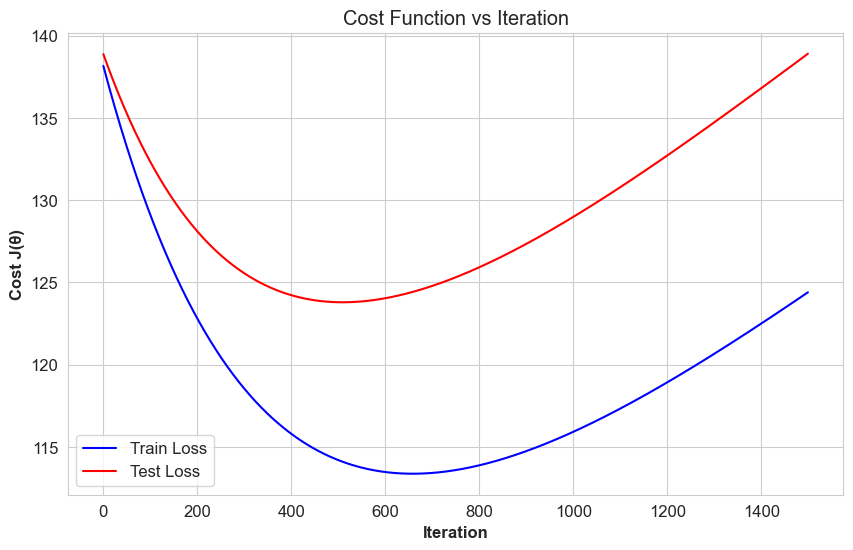

In [278]:
train_loss_history = result_history['GD'][1000]['train_loss_history']
val_loss_history = result_history['GD'][1000]['val_loss_history']
iters = np.arange(epochs)


# Plot configuration
plt.figure(figsize=(10, 6), dpi=100)
sns.set_style("whitegrid")
plt.rcParams['font.size'] = 12
plt.rcParams['axes.labelweight'] = 'bold'

# Plotting
plt.plot(iters, train_loss_history, label='Train Loss', color='blue')
plt.plot(iters, val_loss_history, label='Test Loss', color='red')

plt.xlabel('Iteration')
plt.ylabel('Cost J(θ)')
plt.title('Cost Function vs Iteration')
plt.legend()
plt.show()

In [271]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

def compare_bmi_scaling(bmi_values):
    """
    Compares different scaling methods for BMI squared values and visualizes the results.
    
    Parameters:
    bmi_values (numpy.ndarray): Original BMI values
    
    Returns:
    dict: Dictionary containing scaled values using different methods
    """
    # Calculate BMI squared
    bmi_squared = bmi_values ** 2
    print(bmi_squared.shape)
    # Standard scaling
    scaler = StandardScaler()
    standard_scaled = scaler.fit_transform(bmi_squared.reshape(-1, 1)).flatten()
    print(standard_scaled.shape)
    
    # Log transformation (adding 1 to handle zeros)
    log_scaled = np.log1p(bmi_squared)
    
    # Create visualizations
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))
    
    # Original BMI squared distribution
    ax1.hist(bmi_squared, bins=30)
    ax1.set_title('Original BMI²')
    ax1.set_ylabel('Frequency')
    
    # Standard scaled distribution
    ax2.hist(standard_scaled, bins=30)
    ax2.set_title('StandardScaler BMI²')
    
    # Log scaled distribution
    ax3.hist(log_scaled, bins=30)
    ax3.set_title('Log BMI²')
    
    plt.tight_layout()
    
    # Calculate statistics
    stats = {
        'original': {
            'mean': np.mean(bmi_squared),
            'std': np.std(bmi_squared),
            'skew': np.mean(((bmi_squared - np.mean(bmi_squared))/np.std(bmi_squared))**3)
        },
        'standard': {
            'mean': np.mean(standard_scaled),
            'std': np.std(standard_scaled),
            'skew': np.mean(((standard_scaled - np.mean(standard_scaled))/np.std(standard_scaled))**3)
        },
        'log': {
            'mean': np.mean(log_scaled),
            'std': np.std(log_scaled),
            'skew': np.mean(((log_scaled - np.mean(log_scaled))/np.std(log_scaled))**3)
        }
    }
    
    return {
        'standard_scaled': standard_scaled,
        'log_scaled': log_scaled,
        'stats': stats
    }


(1150,)
(1150,)

Distribution Statistics:

Original:
Mean: 1115958.744
Std: 907707.048
Skewness: 2.056

Standard:
Mean: 0.000
Std: 1.000
Skewness: 2.056

Log:
Mean: 13.624
Std: 0.808
Skewness: -0.290


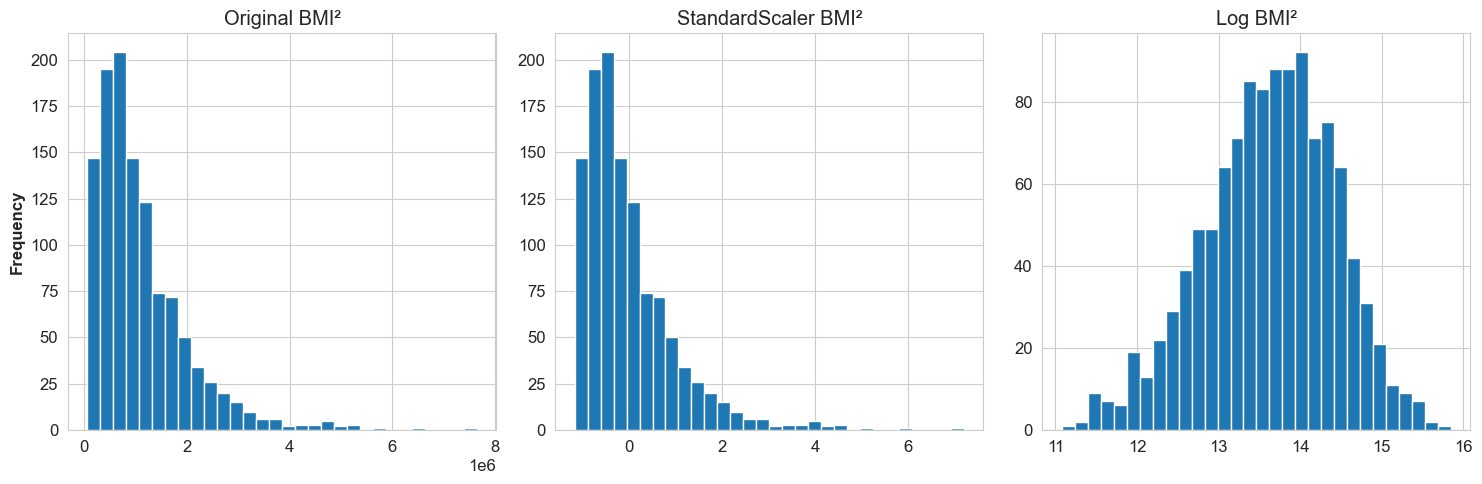

In [272]:
# Assuming bmi_values is your array of BMI values
results = compare_bmi_scaling(df_total['bmi'].to_numpy())
print("\nDistribution Statistics:")
for method, stats in results['stats'].items():
    print(f"\n{method.capitalize()}:")
    print(f"Mean: {stats['mean']:.3f}")
    print(f"Std: {stats['std']:.3f}")
    print(f"Skewness: {stats['skew']:.3f}")